# Transfer learning using tensorflow

In [1]:
import numpy as np

import PIL.Image as Image
import os

import matplotlib.pylab as plt

!pip install tensorflow 
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Make predictions using ready made model (without any training)

In [2]:
pip install tensorflow-hub


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow_hub as hub

#### importing the mobilenet_v2 model from tensorflow library

In [4]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [5]:
hen = Image.open("hen.jpg").resize(IMAGE_SHAPE)

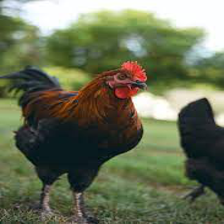

In [6]:
hen

#### Scaling or normalizing the data

In [7]:

hen  = np.array(hen)/255.0
hen.shape

(224, 224, 3)

In [8]:
#adding one more dimaniction as prediction model accept this 
hen[np.newaxis, ...].shape

(1, 224, 224, 3)

In [9]:
result =  classifier.predict(hen[np.newaxis, ...])

1/1 [==============================] - 3s 3s/step


In [10]:
result.shape

(1, 1001)

In [11]:
result

array([[ 0.32457206,  0.02550316,  0.4239493 , ..., -1.3904196 ,
        -0.3634072 , -1.1743213 ]], dtype=float32)

In [12]:
# Index with maximum value
predicted_label_index = np.argmax(result)
predicted_label_index

8

In [13]:
image_labels = []
with open("imagenet1000_clsidx_to_labels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

["{0: 'tench, Tinca tinca',",
 " 1: 'goldfish, Carassius auratus',",
 " 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 " 3: 'tiger shark, Galeocerdo cuvieri',",
 " 4: 'hammerhead, hammerhead shark',"]

In [14]:
#Finding the index value
image_labels[predicted_label_index]

" 8: 'hen',"

# Image has been correctly identified as hen

# Loading flowers dataset

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [16]:
data_dir

'.\\datasets\\flower_photos'

In [17]:
#converting path from string to window to easy access of all flower floders
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [20]:
roses = list(data_dir.glob('roses/*'))
roses[:4]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg')]

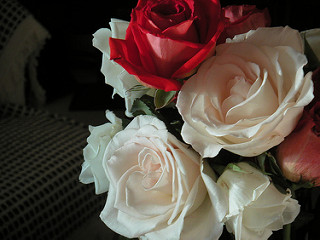

In [21]:
Image.open(str(roses[1]))

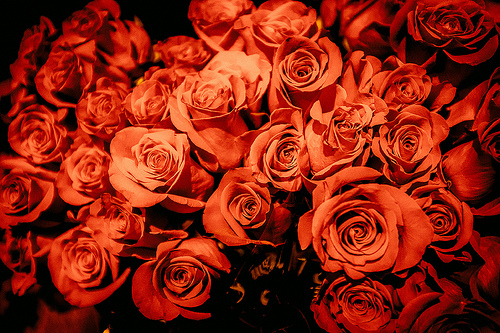

In [22]:
Image.open(str(roses[2]))

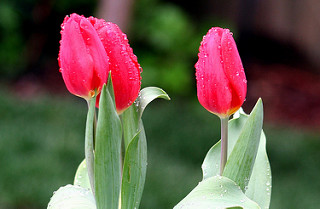

In [23]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

# Creating a dictonary with key as flower name and value as list of flower

In [24]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),}


In [25]:
flowers_images_dict["roses"][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [26]:
#storying key in numarical values

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,}

In [27]:
!pip3 install opencv-python
import cv2
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [28]:
img.shape

(240, 179, 3)

In [29]:
cv2.resize(img,(224,224)).shape


(224, 224, 3)

In [30]:
X = []
y = []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [31]:
X = np.array(X)
y = np.array(y)

# Train test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Preprocessing: scale images

In [33]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [34]:
X[0].shape

(224, 224, 3)

In [35]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [41]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

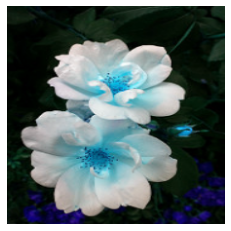

In [36]:
plt.axis('off')
plt.imshow(X[0])

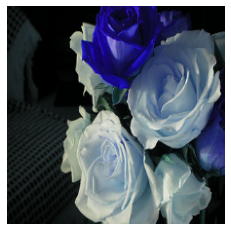

In [37]:
plt.axis('off')
plt.imshow(X[1])

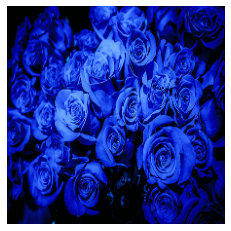

In [38]:
plt.axis('off')
plt.imshow(X[2])

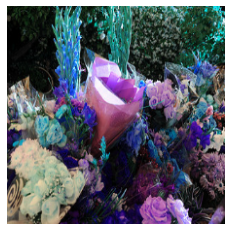

In [39]:
plt.axis('off')
plt.imshow(X[3])

In [42]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 4s 4s/step


array([795, 880, 795], dtype=int64)

### Model is just gussing the images out of those 1000 classes

In [45]:
image_labels[880]

" 880: 'unicycle, monocycle',"

# Using pre-trained model and tuning it for flower images

# using the pre-trained model except the last layer 

In [46]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [48]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])#only lost layer being modified

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [49]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 164s 1s/step - loss: 0.7663 - acc: 0.7142
Epoch 2/5
92/92 [==============================] - 118s 1s/step - loss: 0.4070 - acc: 0.8624
Epoch 3/5
92/92 [==============================] - 101s 1s/step - loss: 0.3213 - acc: 0.8920
Epoch 4/5
92/92 [==============================] - 101s 1s/step - loss: 0.2669 - acc: 0.9128
Epoch 5/5
92/92 [==============================] - 107s 1s/step - loss: 0.2321 - acc: 0.9288


In [51]:
model.evaluate(X_test_scaled,y_test)
#accuracy of the model is 86%

23/23 [==============================] - 26s 1s/step - loss: 0.3525 - acc: 0.8610


[0.3524840176105499, 0.8610354065895081]